In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style()

# Регрессия

In [2]:
Y_pred = np.linspace(-1., 1., 500)
Y_truth = np.zeros((500,))

Функция потери (Loss Function) - ключевая часть любой модели машинного обучения: она является количественным критерием "качества" модели и служит для настройки параметров.

## Mean Squared Error (L2 Loss)

Рассмотрим самую простую модель:

$$h_\theta(x_i) = \theta_0 + \theta_1x$$

Это простая линейная регрессия с двумя коэффициентами. MSE-ошибка - это просто сумма по всем примерам квадрата отклонения предсказания от истинного значения:

$$J = \frac{1}{N} \sum_{i=1}^{N} (y_i - h_\theta(x_i))^2$$

Для модели линейной регрессии мы предполагаем, что целевое значение $Y$ линейно зависит от входных данных $X$ с добавлением шума.

$$Y = \theta_0 + \theta_1x + \eta$$

Будем считать, что шум имеет нормальное распределение с мат ожиданием 0 и дисперсией 1 ($\eta \sim N(0, 1)$). Это означает, что если рассматривать $Y$ как случайную величину, то:

$$E[Y] = E[\theta_0 + \theta_1x + \eta] = \theta_0 + \theta_1x$$
$$Var[Y] = Var[\theta_0 + \theta_1x + \eta] = 1$$

Распишем вероятность наблюдать значение $y_i$ для входящего $x_i$

$$p(y_i \vert x_i) = e^{-\frac{(y_{i} - (\theta_{0} + \theta_{1}x_{i}))^2}{2}}$$

В предположении, что входные данные независимые и одинаково распределенные запишем правдоподобие нашей модели:

$$L(x, y) = \prod_{i=1}^{N}e^{-\frac{(y_i - (\theta_0 + \theta_1x_i))^2}{2}}$$

Перейдем от максимизации правдоподобия к максимизации логарифма правдоподобия (логарифм - монотонная функция)

$$l(x, y) = -\frac{1}{2}\sum_{i=1}^{N}(y_i - (\theta_0 + \theta_1x_i))^2$$

Следующий (и последний) шаг - будем рассматривать $-l(x,y)$ и тогда наша цель будет ее минимизировать

$$-l(x, y) = \frac{1}{2}\sum_{i=1}^{N}(y_i - (\theta_0 + \theta_1x_i))^2$$

Получаем MSE:

$$J = \frac{1}{2}\sum_{i=1}^{N}(y_i - \theta^Tx_i)^2$$

Таким образом оптимизация MSE-Loss - это просто максимизация правдоподобия

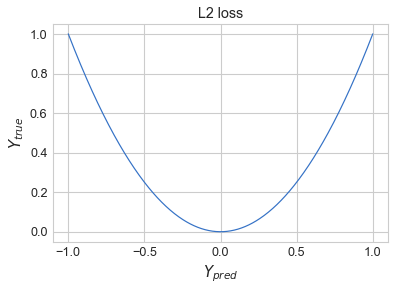

In [3]:
#Calculating the L2 loss
L2_val = np.square(Y_truth - Y_pred)

#ploting the predicted values against the L2 loss
plt.plot(Y_pred, L2_val, 'b-', label='L2 loss' )
plt.title('L2 loss')
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylabel('$Y_{true}$', fontsize=15)
plt.show()

## L1 loss

L1-функция потерь - это почти тоже самое, что и L2, но вместо того, чтобы брать квадрат расстояния, мы будем брать его модуль. L1 более устойчива к выбросам, потому что она не "взрывается" при больших значениях. Однако у нуля он не такой гладкий как L2 и некоторые алгоритмы из-за этого могут хуже сходиться

$$J = \sum_{i=1}^{N}|y_i - \theta^Tx_i|$$

## Практика. Постройте график L1-функции потери

## Конец практики

# Huber Loss
Функция потерь Хьюбера — это функция потерь, которая менее чувствительна к выбросам, чем квадратичная ошибка.

$${\displaystyle L_{\delta }(a)={\begin{cases}{\frac {1}{2}}{a^{2}}&{\text{для }}|a|\leq \delta ,\\\delta (|a|-{\frac {1}{2}}\delta ),&{\text{иначе.}}\end{cases}}}$$

$a = Y_{true} - Y_{pred}$. Эта функция квадратична для малых значений a, и линейна для больших значений, с одинаковым значением и уклоном для различных участков двух точек где ${\displaystyle |a|=\delta }$.

На практике, однако, обычно рассматривают Псевдо Huber Loss, который может быть задан одной формулой:

$${\displaystyle L_{\delta }(a)=\delta ^{2}\left({\sqrt {1+(a/\delta )^{2}}}-1\right).}$$

## Практика. Постройте график Huber функции потери

## Конец практики

# Классификация

In [4]:
Y_pred = np.linspace(-0.99, 0.99, 500)
Y_label = 1
Y_labels = np.ones((500,))

## Cross-Entropy Loss

## Вероятностный взгляд. Бинарная классификация
Рассмотрим задачу классификации. Предположим, что ответ нашей модели $h_\theta(x_i)$ получен на основе логистической регрессии $\sigma(Wx_i + b)$. Ее значения лежат в диапазоне от 0 до 1, что может быть интерпретировано, как вероятность, что $x_i$ принадлежит positive классу. Если вероятность $< 0.5$ - мы делаем предсказание о принадлежности отрицательному классу, а если $>= 0.5$ - положительному. Следовательно:

$$p(y_i = 1 \vert x_i)  = h_\theta(x_i)$$
$$p(y_i = 0 \vert x_i) = 1 - h_\theta(x_i)$$

Мы можем соединить это в одно уравнение:

$$p(y_i | x_i) = [h_\theta(x_i)]^{(y_i)} [1 - h_\theta(x_i)]^{(1 - y_i)}$$

Опять-таки из предположения, что наши данные независимы и одинаково распределены перейдем к правдоподобию:

$$L(x, y) = \prod_{i = 1}^{N}[h_\theta(x_i)]^{(y_i)} [1 - h_\theta(x_i)]^{(1 - y_i)}$$

Точно так же, как в случае MSE, возмьмем логарифм и инвертируем знак. Получим наш loss:

$$J = -\sum_{i=1}^{N} y_i\log (h_\theta(x_i)) + (1 - y_i)\log(1 - h_\theta(x_i))$$

## Многоклассовая классификация

Основная идея - у нас ничего не меняется. Просто теперь вместо двух классов надо учитывать вероятности нескольких классов и теперь наш лосс примет такой вид:

$$-\sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij} \log(h_{\theta}(x_{i}){_j})$$

## Взгляд со стороны теории информации
Перекрестную энтропию можно интерпретировать с помощью теории информации. В теории информации дивергенция Кулбака-Лейблера (KL) измеряет, насколько «отличаются» два распределения вероятностей. Мы можем рассматривать нашу проблему классификации как 2 разных распределения вероятностей: во-первых, распределение для наших фактических меток, где плотность вероятности сосредоточена на правильной метке, а остальная масса отсутствует, и во-вторых, распределение которые мы обучаем, где плотность вероятности массы задаются выходными результатами наших исходных оценок через функцию softmax.

## Практика. Постройте график Cross-Entropy-функции потери

## Конец практики

## Специальные виды cross_entropy
### sigmoid cross-entropy (Binary Cross-Entropy Loss)
Сначала применяем sigmoid, потом считаем cross_entropy. Применяется, когда объект может принадлежать нескольким классам.

$${\displaystyle \sigma (x)={\frac {1}{1+e^{-x}}}.}$$

### softmax cross-entropy (Categorical Cross-Entropy loss)
Сначала делаем softmax, потом считаем cross_entropy. Применяется, когда объект может принадлежать только одному классу. Т.к. softmax выравнивает вероятности (суммируются к одному для всех классов)

$${\displaystyle \sigma (z)_{i}={\frac {e^{z_{i}}}{\displaystyle \sum _{k\mathop {=} 1}^{K}e^{z_{k}}}}}$$

# Специальные меры расстояния

## Косинусное расстояние
Обычно применяется для сравнения текстов

$$\cos(\theta )={A\cdot B \over \|A\|\|B\|}={\frac  {\sum \limits _{{i=1}}^{{n}}{A_{i}\times B_{i}}}{{\sqrt  {\sum \limits _{{i=1}}^{{n}}{(A_{i})^{2}}}}\times {\sqrt  {\sum \limits _{{i=1}}^{{n}}{(B_{i})^{2}}}}}}$$

Одна из причин популярности косинуснуго расстояния - оно эффективно для разреженных векторов, так как  учитывает только ненулевые измерения. Вторая - расстояние зависит только от угла между векторами, но не зависит от их абсолютных размеров.

# Оптимизация

Оптимизация — в математике, информатике и исследовании операций задача нахождения экстремума (минимума или максимума) целевой функции в некоторой области конечномерного векторного пространства, ограниченной набором линейных и/или нелинейных равенств и/или неравенств.

Методы оптимизации классифицируют в соответствии с задачами оптимизации:
* Локальные методы: сходятся к какому-нибудь локальному экстремуму целевой функции. В случае унимодальной целевой функции, этот экстремум единственен, и будет глобальным максимумом/минимумом.
* Глобальные методы: имеют дело с многоэкстремальными целевыми функциями. При глобальном поиске основной задачей является выявление тенденций глобального поведения целевой функции.

По требованиям к гладкости и наличию у целевой функции частных производных, их также можно разделить на:
* прямые методы, требующие только вычислений целевой функции в точках приближений;
* методы первого порядка: требуют вычисления первых частных производных функции;
* методы второго порядка: требуют вычисления вторых частных производных, то есть гессиана целевой функции.

(by Wikipedia.org)

## Градиентный спуск
Оптимизационный алгоритм для поиска локального минимума функции. Относится к методам первого порядка. Для поиска минимума делаем шаг в направлении, обратном градиенту функции.

Алгоритм:
1. Задаем $\gamma$ - "learning rate"
2. Выбираем начальное приближение $x_0$
3. for k = 0, 1, 2 ... do
    1. $s_k$ = -$\nabla f(x_k)$
    2. $x_{k+1} = x_k + \gamma s_k$

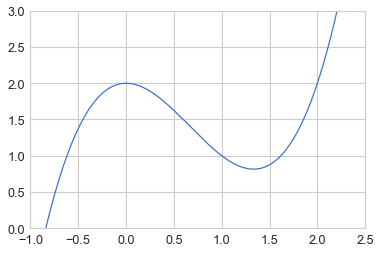

In [5]:
f = lambda x: x**3-2*x**2+2
x = np.linspace(-1,2.5,1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

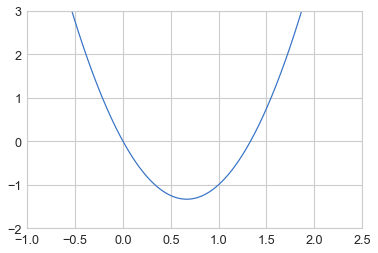

In [6]:
f_prime = lambda x: 3*x**2-4*x
x = np.linspace(-1,2.5,1000)
plt.plot(x,f_prime(x))
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Практика. Реализуйте метод градиентного спуска

## Конец практики

## Пример из практики

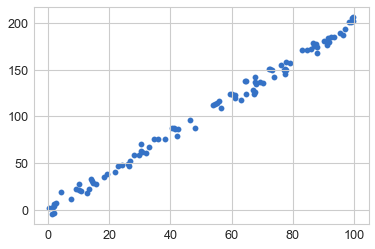

In [7]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

<img src="gradientdescentofmsetable.png"/>

## Практика. Примените метод градиентного спуска

## Конец практики

## Стохастический градиентный спуск
Для больших датасетов один шаг градиентного спуска стоит очень дорого. Выход - будет делать маленький шажок на каждый пример

## Практика. Реализуйте метод стохастического градиентного спуска

## Конец практики

## Методы второго порядка
Рассмотренные нами выше методы - это методы первого порядка (требуется вычисление первой производной). Существуют методы оптимизации, требующие вычисления второй производной. Самый базовый из них - метод Ньютона

Это итерационный численный метод нахождения корня (нуля) заданной функции. Метод был впервые предложен английским физиком, математиком и астрономом Исааком Ньютоном, под именем которого и обрёл свою известность. Поиск решения осуществляется путём построения последовательных приближений и основан на принципах простой итерации. В случае решения задач оптимизации предполагается, что функция $f(x)$ дважды непрерывно дифференцируема. 

Смотрим на разложение функции в ряд Тейлора:

$${\displaystyle f_{T}(x)=f_{T}(x_{n}+\Delta x)\approx f(x_{n})+f'(x_{n})\Delta x+{\frac {1}{2}}f''(x_{n})\Delta x^{2}.}$$

В идеале, мы хотим найти выбрать $\Delta x$  так, чтобы $x_k + \Delta x$ была стационарной точкой f. Используя приближение рядом Тейлора мы можем найти $\Delta x$, приравняв его производную к 0:

$${\displaystyle \displaystyle 0={\frac {\rm {d}}{\rm {d\Delta x}}}\left(f(x_{n})+f'(x_{n})\Delta x+{\frac {1}{2}}f''(x_{n})\Delta x^{2}\right)=f'(x_{n})+f''(x_{n})\Delta x}$$
$${\displaystyle \Delta x=-{\frac {f'(x_{n})}{f''(x_{n})}}.}$$

Неудобство этого метода состоит в необходимости вычисления в каждой точке первой и второй производных. Значит, он применим лишь тогда, когда функция $f(x)$ имеет достаточно простую аналитическую форму, чтобы производные могли быть вычислены в явном виде вручную.

По метариалам http://www.machinelearning.ru/wiki/index.php?title=Метод_Ньютона._Проблема_области_сходимости._Метод_парабол._Совмещение_методов_Ньютона_и_парабол

## Broyden-Fletcher-Goldfarb-Shanno algorithm (BFGS)
Неудобство вычисления Гессиана функции приводит к появлению целого ряда квази-ньютоновских методов

BFGS — один из наиболее широко применяемых квазиньютоновских методов. В квазиньютоновских методах не вычисляется напрямую гессиан функции. Вместо этого гессиан оценивается приближенно, исходя из сделанных до этого шагов. Также существуют модификация данного метода с ограниченным использованием памяти (L-BFGS), который предназначен для решения нелинейных задач с большим количеством неизвестных, а также модификация с ограниченным использованием памяти в многомерном кубе (L-BFGS-B).

Описание алгоритма - смотри тут https://ru.wikipedia.org/wiki/Алгоритм_Бройдена_—_Флетчера_—_Гольдфарба_—_Шанно

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [9]:
def square(X):
    return X[0]**2 + X[1]**2

phi_m = np.linspace(-2, 2, 100)
phi_p = np.linspace(-2, 2, 100)
X,Y = np.meshgrid(phi_p, phi_m)
XY = np.hstack((X.reshape(-1, 1), Y.reshape(-1,1)))
Z = np.array([square(t) for t in XY]).reshape(X.shape)

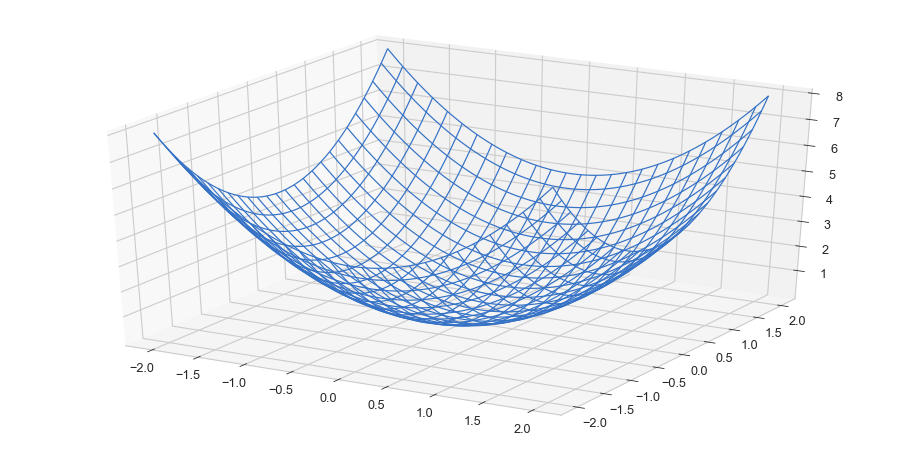

In [10]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
# Add a color bar which maps values to colors.

plt.show()

In [11]:
from scipy.optimize import minimize

In [12]:
res = minimize(square, np.array((1,1)), method='BFGS')

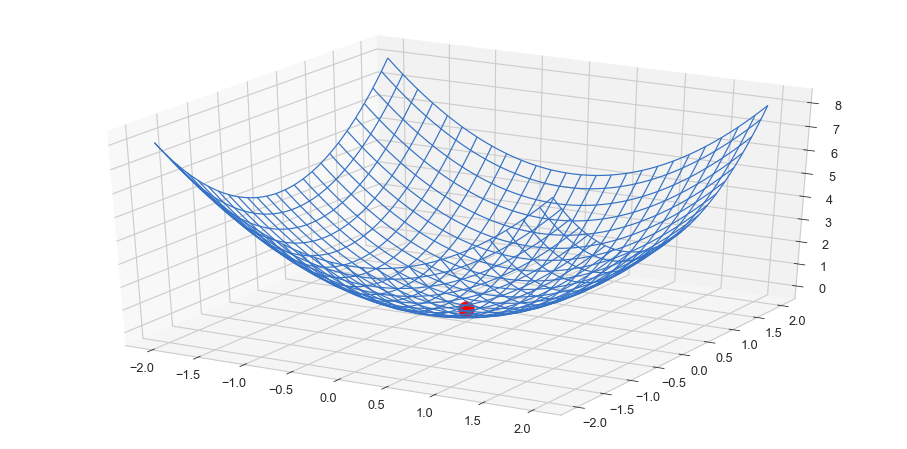

In [13]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
ax.scatter(res.x[0].reshape(-1, 1), res.x[1].reshape(-1, 1), np.array([square(res.x)]).reshape(-1,1),
          c='red', s=256)

plt.show()

## Метод сопряжённых градиентов (Newton conjugate gradient method)
Использует метод сопряженных градиентов (http://www.machinelearning.ru/wiki/index.php?title=Метод_сопряжённых_градиентов) для приблизительного вычисления обратной матрицы Гессе.
Для его работы требуется в явном виде задавать частные производные функции (аналитически)

In [14]:
def square_der(X):
    return np.array((2 * X[0], 2 * X[1]))

In [15]:
res = minimize(square, np.array((1,1)), jac=square_der, method='Newton-CG')

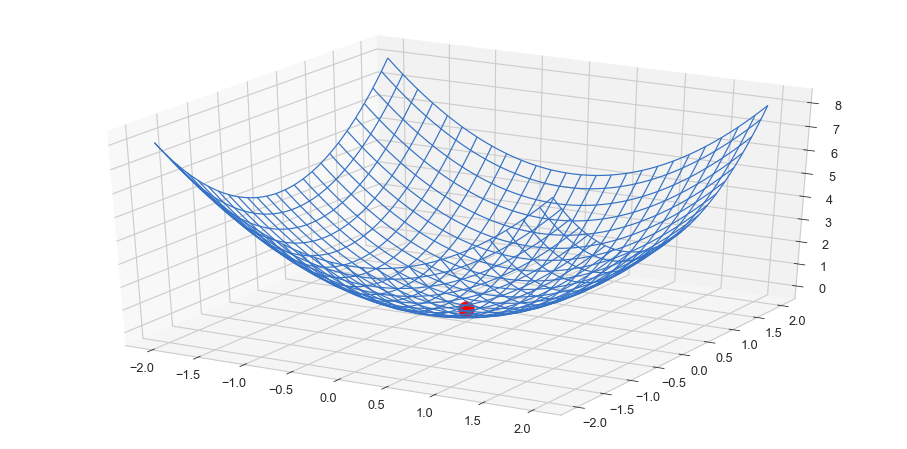

In [16]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
ax.scatter(res.x[0].reshape(-1, 1), res.x[1].reshape(-1, 1), np.array([square(res.x)]).reshape(-1,1),
          c='red', s=256)

plt.show()

## Другие методы оптимизации
* Sequential Least SQuares Programming (SLSQP) Algorithm
<img src='slsqp.png'/>
* Метод Брента
    https://en.wikipedia.org/wiki/Brent%27s_method
    scipy.optimize.brent
* Симплекс-метод
* ...

# Домашнее задание
* Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
* Реализовать самостоятельно логистическую регрессию
    * Обучить ее методом градиентного спуска
    * Методом nesterov momentum
    * Методом rmsprop
* В качестве dataset'а взять Iris, оставив 2 класса:
    * Iris Versicolor
    * Iris Virginica

# Литература
* https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0
* https://habr.com/post/413853/
* https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html